# Compare growth rate of differnet cases

In [11]:
# Librerías estándar y de terceros
import os
import sys
import gc
import math as m
import numpy as np
import scipy
import pandas as pd
from scipy import *
from scipy.signal import butter, filtfilt, hilbert
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
from scipy.interpolate import interp1d
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import pylab
params = {'legend.fontsize': 'x-Large',
          'figure.figsize': (15, 6),
         'axes.labelsize': 33,
         'axes.titlesize':33,
         'xtick.labelsize':30,
         'ytick.labelsize':30,
    'font.family': 'STIXGeneral',  
    'axes.titleweight': 'normal',
    'axes.labelweight': 'normal',
    'text.usetex': True, 
}

pylab.rcParams.update(params)
sys.path.append('/projects/DEIKE/cmartinb/functions')
from prepare import load_object, save_object, field
from defs import Case, Interface2D
from phase import extract_phase
from funciones import * 

os.chdir('/projects/DEIKE/cmartinb/')

In [2]:
def c(g,k,sigma,rho):
    c= np.sqrt(g/k + sigma*k/rho)
    return c
g = np.array([4, 1, 0.5])  # u/c = [0.125, 0.25, 0.5]
ak_values = [0.08, 0.16]
sigma = np.array([0.00125, 0.0003125,  0.00006125])
cc= np.array([1, 0.5, 0.33])
rho = 1

uc_values = [0.25, 0.5, 0.75]  # Asegúrate de incluir 0.75 aquí
uc_color_map = {
    0.25: 'Blues',
    0.5: 'PuRd',
    0.75: 'Greens'  # Asegúrate de tener un color asignado para 0.75
}

Re_water = 2.5 * 10**4
kk = np.linspace(1,20,20)
k_all = np.linspace(0,100,25)
nu_water_025 = cc[0]*2 * m.pi / (4 *Re_water)
nu_water_05 = cc[1]*2 * m.pi / (4 *Re_water)
nu_water_075 = cc[2]*2 * m.pi / (4 *Re_water)


In [4]:
df_kpHs008_upc025 = pd.read_csv('energies/kpHs008_upc025_energies_40.csv', names=['i', 'k_start', 'k_end', 'F_integral_interval', 'omegat'])

df_kpHs016_upc025 = pd.read_csv('energies/kpHs016_upc025_energies_40.csv', names=['i', 'k_start', 'k_end', 'F_integral_interval', 'omegat'])

df_kpHs008_upc05 = pd.read_csv('energies/kpHs008_upc05_energies_40.csv', names=['i', 'k_start', 'k_end', 'F_integral_interval', 'omegat'])

df_kpHs016_upc05 = pd.read_csv('energies/kpHs016_upc05_energies_40.csv', names=['i', 'k_start', 'k_end', 'F_integral_interval', 'omegat'])

df_kpHs008_upc075 = pd.read_csv('energies/kpHs008_upc075_energies_40.csv', names=['i', 'k_start', 'k_end', 'F_integral_interval', 'omegat'])

df_kpHs016_upc075 = pd.read_csv('energies/kpHs016_upc075_energies_40.csv', names=['i', 'k_start', 'k_end', 'F_integral_interval', 'omegat'])


In [5]:
df_beta_kpHs008_upc025 = pd.read_csv('betas/betas_kpHs008_upc025.csv')

df_beta_kpHs016_upc025 = pd.read_csv('betas/betas_kpHs016_upc025.csv')

df_beta_kpHs008_upc05 = pd.read_csv('betas/betas_kpHs008_upc05.csv')

df_beta_kpHs016_upc05 = pd.read_csv('betas/betas_kpHs016_upc05.csv')

df_beta_kpHs008_upc075 = pd.read_csv('betas/betas_kpHs008_upc075.csv')

df_beta_kpHs016_upc075 = pd.read_csv('betas/betas_kpHs016_upc075.csv')


ak=0.08 u/c=0.25 L =10
omegap 4.0
ak=0.16 u/c=0.25 L =10
omegap 4.0
ak=0.08 u/c=0.5 L =10
omegap 2.0
ak=0.16 u/c=0.5 L =10
omegap 2.0
ak=0.08 u/c=0.75 L =10
omegap 1.4142135623730951
ak=0.16 u/c=0.75 L =10
omegap 1.4142135623730951


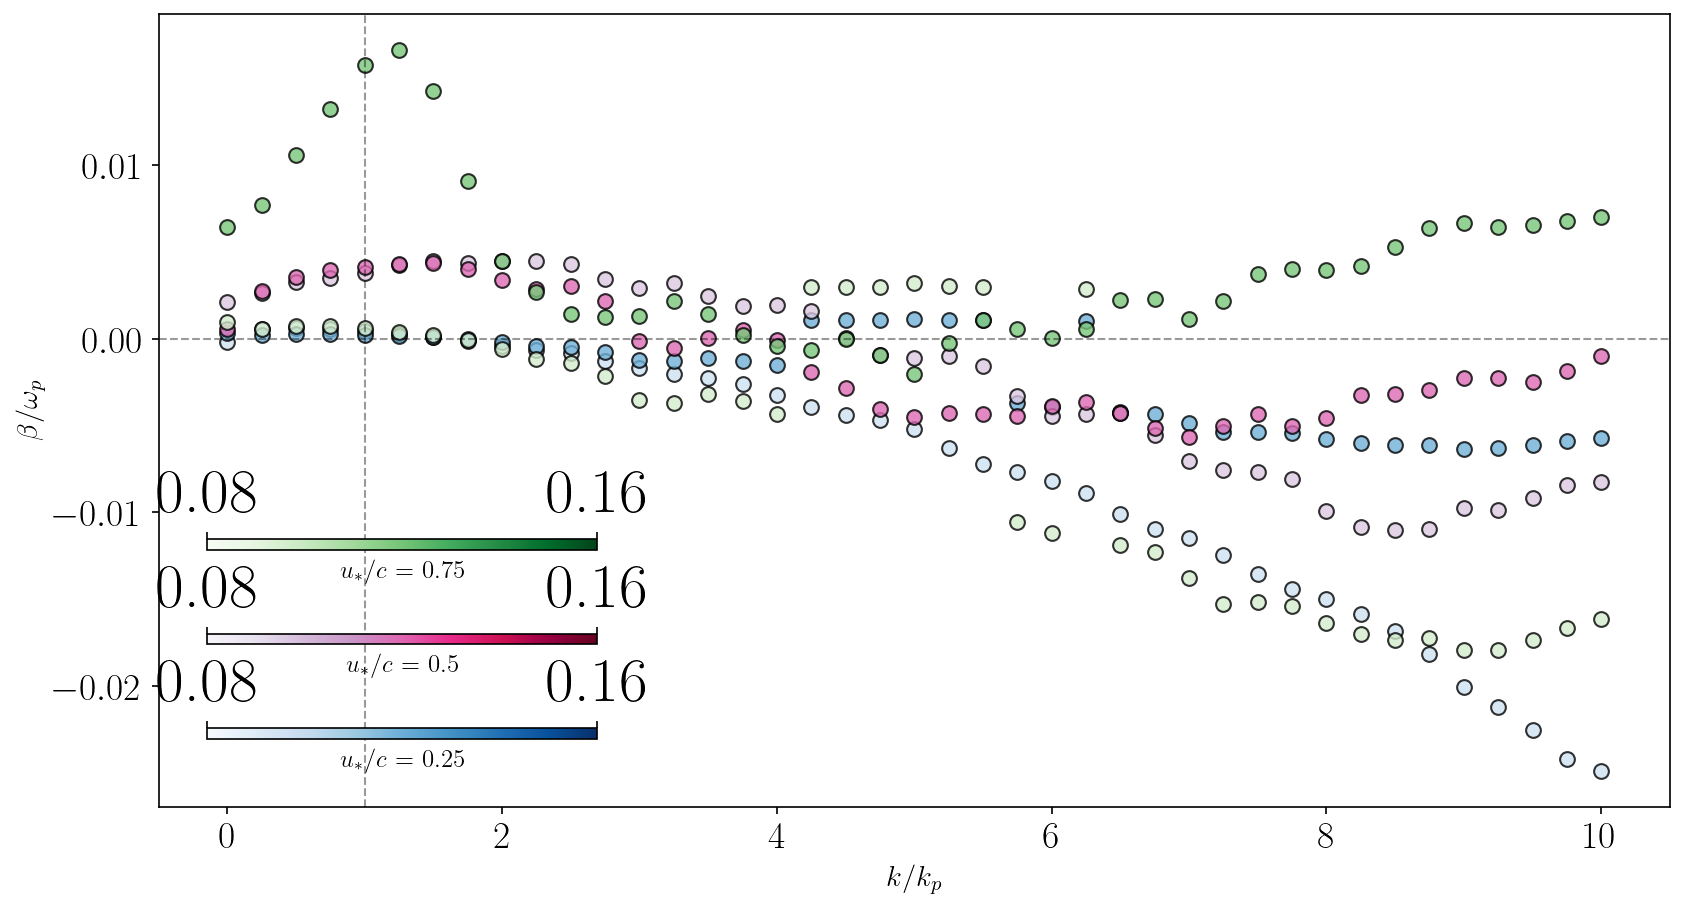

In [9]:
import math as m
from scipy.stats import linregress

fig, ax4 = plt.subplots(figsize=(13, 7))

avg = []
avg2 = []
cbound = []
cfree = []
avgfree=[]
avgbound=[]
        
cfree_mean =[]
cbound_mean =[]



g = np.array([4, 1, 0.5])  # u/c = [0.125, 0.25, 0.5]
sigma = np.array([0.00125, 0.0003125,  0.00006125])
cc= np.array([1, 0.5, 0.33])
rho = 1

uc_values = [0.25, 0.5, 0.75]  # Asegúrate de incluir 0.75 aquí
uc_color_map = {
    0.25: 'Blues',
    0.5: 'PuRd',
    0.75: 'Greens'  # Asegúrate de tener un color asignado para 0.75
}

ratio = (0.25-0.1)/(0.6*7/8) # ak per unit colour
vmin = 0.1 - ratio*(0.2+0.6*1/8)
vmax = 0.25 + ratio*0.2
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

#color = [plt.cm.get_cmap('magma')((j+2) /8), plt.cm.get_cmap('viridis')((j+2) /8) , 
norm_u11 =[]
norm_u22 =[]

Re_water = 2.5 * 10**4
kk = np.linspace(1,20,20)
k_all = np.linspace(0,100,25)
nu_water_025 = cc[0]*2 * m.pi / (4 *Re_water)
nu_water_05 = cc[1]*2 * m.pi / (4 *Re_water)
nu_water_075 = cc[2]*2 * m.pi / (4 *Re_water)

k_threshold = []

size_min = 0 # Tamaño mínimo del marcador
size_max = 240  # Tamaño máximo del marcador

        # Inicializa los tamaños de los marcadores
size_normal = 0
size_highlighted = 240
#k_values = df['k']  # Reemplazar con tu columna real de valores 'k'
# Normalizar los valores 'k' al rango [0, 1]
#k_normalized = (k_values - k_values.min()) / (k_values.max() - k_values.min())
# Escalar al rango de tamaños de marcadores
marker_sizes = size_min + (size_max - size_min) 

threshold_list = []
level_values = np.array([10,11])

for i, uc in enumerate(uc_values):
    cmap = plt.cm.get_cmap(uc_color_map[uc])
    for ma, level in enumerate(level_values):

        if level == 10:
            
            for j, ak in enumerate(ak_values):
                
                label = f'ak={ak} u/c={uc} L ={level}'
                print(label)
                if uc == 0.25:
                    i = 0
                    omegap = np.sqrt(4*4)
                    nu_water = nu_water_025
                    ls = 'o'
                    if ak == 0.08:
                        df_beta = df_beta_kpHs008_upc025

                    elif ak == 0.16:
                        #print('entra ak16 uc25')
                        df_beta = df_beta_kpHs016_upc025

                elif uc == 0.5:
                    i = 1
                    omegap = np.sqrt(4*1)
                    nu_water = nu_water_05
                    ls = 'o'
                    if ak == 0.08:
                        df_beta = df_beta_kpHs008_upc05

                    elif ak == 0.16:
                        #print('entra ak16 uc25')
                        df_beta = df_beta_kpHs016_upc05
                        
                elif uc == 0.75:
                    i = 2
                    omegap = np.sqrt(4*0.5)
                    nu_water = nu_water_075
                    ls = 'o'
                    if ak == 0.08:
                        df_beta = df_beta_kpHs008_upc075

                    elif ak == 0.16:
                        #print('entra ak16 uc25')
                        df_beta = df_beta_kpHs016_upc075
                    
                
                color = cmap(norm(ak))
                print('omegap', omegap)
                #-----------------------------------------
                #print( ak , color, j)
                
                df_growth = df_beta[df_beta['Tipo'] == 'Growth']
                df_decay = df_beta[df_beta['Tipo'] == 'Decay']
                

                # Grafica todos los puntos con el tamaño normal
                ax4.scatter(df_growth['k']/4, df_growth['Beta']/omegap,alpha=0.8, color=color, marker= ls, s=50, edgecolors= 'k')
                ax4.scatter(df_decay['k']/4, df_decay['Beta']/omegap,alpha=0.8, color=color, marker= ls, s=50, edgecolors= 'k')

            #----------------------------------------

#kk = np.linspace(0,80, len(df['omega'][1:]))
            
#ax4.plot(g[i]*kk/omegap**2, (g[i]*kk)**(1/2)/omegap , '--', alpha=0.7, color='gray', lw=2)

#ax4.text(8,2.2, r'$\sqrt{gk}$' , color='grey', fontsize = 15)

legend_elements = []

vmin = 0.08
vmax = 0.16
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

# Calculate positions for the colorbars vertically stacked
colorbar_height = 0.01  # The height of each colorbar
colorbar_width = 0.2  # The width of each colorbar
vertical_spacing = 0.08  # Space between colorbars
colorbar_start_x = 0.15 # X position where the colorbars start
colorbar_start_y = 0.1 # Y position where the first (bottom) colorbar starts

colorbar_positions = {
    0.25: [colorbar_start_x, colorbar_start_y + colorbar_height + vertical_spacing, colorbar_width, colorbar_height],
    0.5: [colorbar_start_x, colorbar_start_y + 2 * (colorbar_height + vertical_spacing), colorbar_width, colorbar_height],
    0.75 : [colorbar_start_x, colorbar_start_y + 3 * (colorbar_height + vertical_spacing), colorbar_width, colorbar_height]

}

ak_values_normalized = [0.08,0.16]

for uc, cmap_name in uc_color_map.items():
    cmap = plt.cm.get_cmap(cmap_name)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # Necessary for the colorbar to use ScalarMappable
    
    # Add an axis for each colorbar
    cb_ax = fig.add_axes(colorbar_positions[uc])  # Adjust the position as needed
    cb = plt.colorbar(sm, cax=cb_ax, orientation='horizontal')
    cb.set_label(f'$u_*/c$ = {uc}', fontsize=12)
    cb.set_ticks([vmin, vmax])
    cb.set_ticklabels([str(vmin), str(vmax)])
    cb.ax.xaxis.set_ticks_position('top')
    cb.set_ticks(ak_values_normalized)
    # Set tick labels corresponding to ak values
    cb.set_ticklabels(['0.08', '0.16'])


ax4.axvline(x=1, color='k', linestyle='--', linewidth=1, alpha= 0.4,  label=r'$k/k_{p}=1$')
ax4.axhline(y=0, color='k', linestyle='--', linewidth=1, alpha= 0.4,  label=r'$k/k_{p}=1$')
#legend_elements.append(Line2D([0], [0], marker='v', color='black', label='Level = 11', markersize=10))
#legend_elements.append(Line2D([0], [0], marker='o', color='black', label='Level = 10', markersize=10))


#Añade la leyenda al gráfico
#ax4.legend(handles=legend_elements, loc='lower right', fontsize=13)


#ax4.set_yscale('log')
#ax4.set_xscale('log')
#ax4.set_ylim([10**-3,10**-1])
#ax4.set_xlim([0.9,10**1.1])

#ax4.set_ylim([0,7.5])
#ax4.set_xlim([0,10])
ax4.tick_params(axis='x', labelsize=18)
ax4.tick_params(axis='y', labelsize=18)

ax4.set_xlabel(r'$k/k_p$', fontsize=14)
ax4.set_ylabel(r'$\beta / \omega_{p}$', fontsize=14)
#ax4.set_tittle('Growth and Decay Rates by Wavenumber', fontsize=16)
plt.show()

ak=0.08 u/c=0.25 L =10
entra ak08 uc25
omegap 4.0
4.0
ak=0.16 u/c=0.25 L =10
entra ak16 uc25
omegap 4.0
4.0
ak=0.08 u/c=0.5 L =10
omegap 2.0
2.0
ak=0.16 u/c=0.5 L =10
omegap 2.0
2.0
ak=0.08 u/c=0.75 L =10
omegap 1.4142135623730951
1.4142135623730951
ak=0.16 u/c=0.75 L =10
omegap 1.4142135623730951
1.4142135623730951


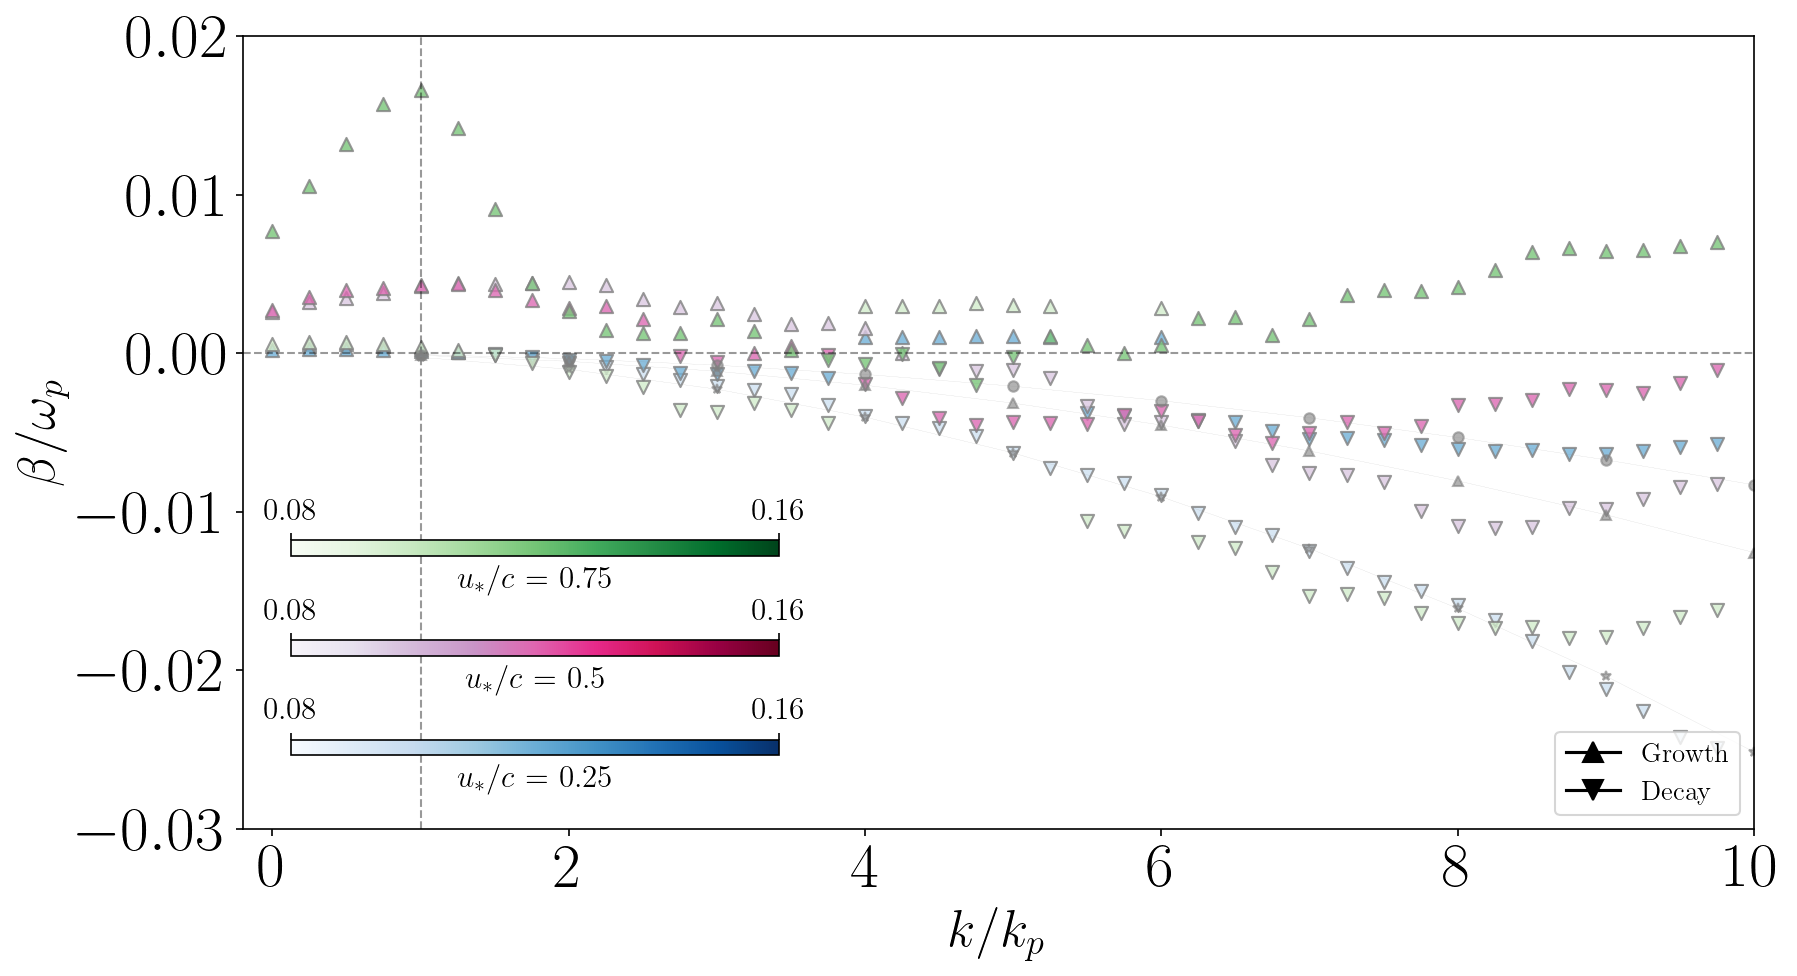

In [14]:
import math as m
from scipy.stats import linregress
plt.rcParams.update({
    'font.size': 20,
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'text.usetex': True,  # Usa LaTeX para renderizar texto
    'legend.fontsize': 'x-large',
    'figure.figsize': (14, 9),
    'axes.labelsize': 25,
    'axes.titlesize': 30,
    'xtick.labelsize': 30,
    'ytick.labelsize': 30,
    'figure.dpi': 150
})



fig, ax4 = plt.subplots(figsize=(13, 7))

avg = []
avg2 = []
cbound = []
cfree = []
avgfree=[]
avgbound=[]
        
cfree_mean =[]
cbound_mean =[]



g = np.array([4, 1, 0.5])  # u/c = [0.125, 0.25, 0.5]
sigma = np.array([0.00125, 0.0003125,  0.00006125])
cc= np.array([1, 0.5, 0.33])
rho = 1

uc_values = [0.25, 0.5, 0.75]  # Asegúrate de incluir 0.75 aquí
uc_color_map = {
    0.25: 'Blues',
    0.5: 'PuRd',
    0.75: 'Greens'  # Asegúrate de tener un color asignado para 0.75
}

ratio = (0.25-0.1)/(0.6*7/8) # ak per unit colour
vmin = 0.1 - ratio*(0.2+0.6*1/8)
vmax = 0.25 + ratio*0.2
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

#color = [plt.cm.get_cmap('magma')((j+2) /8), plt.cm.get_cmap('viridis')((j+2) /8) , 
norm_u11 =[]
norm_u22 =[]

Re_water = 2.5 * 10**4
kk = np.linspace(1,20,20)
k_all = np.linspace(0,100,25)
nu_water_025 = cc[0]*2 * m.pi / (4 *Re_water)
nu_water_05 = cc[1]*2 * m.pi / (4 *Re_water)
nu_water_075 = cc[2]*2 * m.pi / (4 *Re_water)

k_threshold = []

size_min = 0 # Tamaño mínimo del marcador
size_max = 240  # Tamaño máximo del marcador

        # Inicializa los tamaños de los marcadores
size_normal = 0
size_highlighted = 240

marker_sizes = size_min + (size_max - size_min) 

threshold_list = []
level_values = np.array([10,11])

for i, uc in enumerate(uc_values):
    cmap = plt.cm.get_cmap(uc_color_map[uc])
    for ma, level in enumerate(level_values):

        if level == 10:
            
            for j, ak in enumerate(ak_values):
                
                label = f'ak={ak} u/c={uc} L ={level}'
                print(label)
                if uc == 0.25:
                    i = 0
                    omegap = np.sqrt(4*4)
                    nu_water = nu_water_025
                    ls = 'o'
                    if ak == 0.08:
                        print('entra ak08 uc25')
                        df_beta = df_beta_kpHs008_upc025

                    elif ak == 0.16:
                        print('entra ak16 uc25')
                        df_beta = df_beta_kpHs016_upc025

                elif uc == 0.5:
                    i = 1
                    omegap = np.sqrt(4*1)
                    nu_water = nu_water_05
                    ls = 'o'
                    if ak == 0.08:
                        df_beta = df_beta_kpHs008_upc05

                    elif ak == 0.16:
                        #print('entra ak16 uc25')
                        df_beta = df_beta_kpHs016_upc05
                        
                elif uc == 0.75:
                    i = 2
                    omegap = np.sqrt(4*0.5)
                    nu_water = nu_water_075
                    ls = 'o'
                    if ak == 0.08:
                        df_beta = df_beta_kpHs008_upc075

                    elif ak == 0.16:
                        #print('entra ak16 uc25')
                        df_beta = df_beta_kpHs016_upc075
                    
                
                color = cmap(norm(ak))
                print('omegap', omegap)
                #-----------------------------------------
                #print( ak , color, j)
                
                df_growth = df_beta[df_beta['Tipo'] == 'Growth']
                df_decay = df_beta[df_beta['Tipo'] == 'Decay']
                
                print(omegap)
                
                # Grafica todos los puntos con el tamaño normal
                ax4.scatter((df_growth['k'][1:]-1)/4, df_growth['Beta'][1:]/omegap,alpha=0.8, color=color, marker= "^", s = 40, edgecolors= 'grey')
                ax4.scatter((df_decay['k']-1)/4, df_decay['Beta']/omegap,alpha=0.8, color=color, marker= "v", s = 40, edgecolors= 'grey')

            #----------------------------------------

#kk = np.linspace(0,80, len(df['omega'][1:]))
            
#ax4.plot(g[i]*kk/omegap**2, (g[i]*kk)**(1/2)/omegap , '--', alpha=0.7, color='gray', lw=2)

#ax4.text(8,2.2, r'$\sqrt{gk}$' , color='grey', fontsize = 15)

legend_elements = []

vmin = 0.08
vmax = 0.16
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

# Calculate positions for the colorbars vertically stacked
colorbar_height = 0.015  # The height of each colorbar
colorbar_width = 0.25  # The width of each colorbar
vertical_spacing = 0.08  # Space between colorbars
colorbar_start_x = 0.15 # X position where the colorbars start
colorbar_start_y = 0.1 # Y position where the first (bottom) colorbar starts

colorbar_positions = {
    0.25: [colorbar_start_x, colorbar_start_y + colorbar_height + vertical_spacing, colorbar_width, colorbar_height],
    0.5: [colorbar_start_x, colorbar_start_y + 2 * (colorbar_height + vertical_spacing), colorbar_width, colorbar_height],
    0.75 : [colorbar_start_x, colorbar_start_y + 3 * (colorbar_height + vertical_spacing), colorbar_width, colorbar_height]

}

ak_values_normalized = [0.08,0.16]

for uc, cmap_name in uc_color_map.items():
    cmap = plt.cm.get_cmap(cmap_name)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # Necessary for the colorbar to use ScalarMappable
    
    # Add an axis for each colorbar
    cb_ax = fig.add_axes(colorbar_positions[uc])  # Adjust the position as needed
    cb = plt.colorbar(sm, cax=cb_ax, orientation='horizontal')
    cb.set_label(f'$u_*/c$ = {uc}',fontsize=15)
    cb.set_ticks([vmin, vmax])
    cb.set_ticklabels([str(vmin), str(vmax)])
    cb.ax.xaxis.set_ticks_position('top')
    cb.set_ticks(ak_values_normalized)
    # Set tick labels corresponding to ak values
    cb.set_ticklabels(['0.08', '0.16'])
    # Reduce the size of tick labels
    cb.ax.tick_params(labelsize=15) 

ax4.axvline(x=1, color='k', linestyle='--', linewidth=1, alpha= 0.4,  label=r'$k/k_{p}=1$')
ax4.axhline(y=0, color='k', linestyle='--', linewidth=1, alpha= 0.4,  label=r'$k/k_{p}=1$')

legend_elements.append(Line2D([0], [0], marker='^', color='black', label=r'Growth', markersize=10))
legend_elements.append(Line2D([0], [0], marker='v', color='black', label=r'Decay', markersize=10))


#legend_elements.append(Line2D([0], [0], marker='*', color='black', label=r'$\nu_{0.25}$', markersize=10))
#legend_elements.append(Line2D([0], [0], marker='^', color='black', label=r'$\nu_{0.5}$', markersize=10))
#legend_elements.append(Line2D([0], [0], marker='o', color='black', label=r'$\nu_{0.75}$', markersize=10))


#Añade la leyenda al gráfico
ax4.legend(handles=legend_elements, loc='lower right', fontsize=13)

ax4.plot(kk, - 4 * nu_water_025 * kk**2,'--*' , c='gray', alpha = 0.6, lw = 0.1, ms = 5)
ax4.plot(kk, - 4 * nu_water_05 * kk**2,  '--^',c='gray',  alpha = 0.6, lw = 0.1 , ms = 5)
ax4.plot(kk, - 4 * nu_water_075 * kk**2,  '--o',c='gray',  alpha = 0.6, lw = 0.1 , ms = 5)

#ax4.set_yscale('log')
#ax4.set_xscale('log')
#ax4.set_ylim([10**-3,10**-1])
#ax4.set_xlim([0.9,10**1.1])

ax4.set_ylim([-0.03,0.02])
ax4.set_xlim([-0.2,10])
ax4.tick_params(axis='x')
ax4.tick_params(axis='y')

ax4.set_xlabel(r'$k/k_p$')
ax4.set_ylabel(r'$\beta / \omega_{p}  $') #
#ax4.set_tittle('Growth and Decay Rates by Wavenumber', fontsize=16)
plt.show()

ak=0.08 u/c=0.25 L =10
entra ak08 uc25
omegap 4.0
(6,) (6,)
(35,) (35,)
ak=0.16 u/c=0.25 L =10
entra ak16 uc25
omegap 4.0
(14,) (14,)
(27,) (27,)
ak=0.08 u/c=0.5 L =10
omegap 2.0
(19,) (19,)
(22,) (22,)
ak=0.16 u/c=0.5 L =10
omegap 2.0
(14,) (14,)
(27,) (27,)
ak=0.08 u/c=0.75 L =10
omegap 1.4142135623730951
(14,) (14,)
(27,) (27,)
ak=0.16 u/c=0.75 L =10
omegap 1.4142135623730951
(35,) (35,)
(6,) (6,)


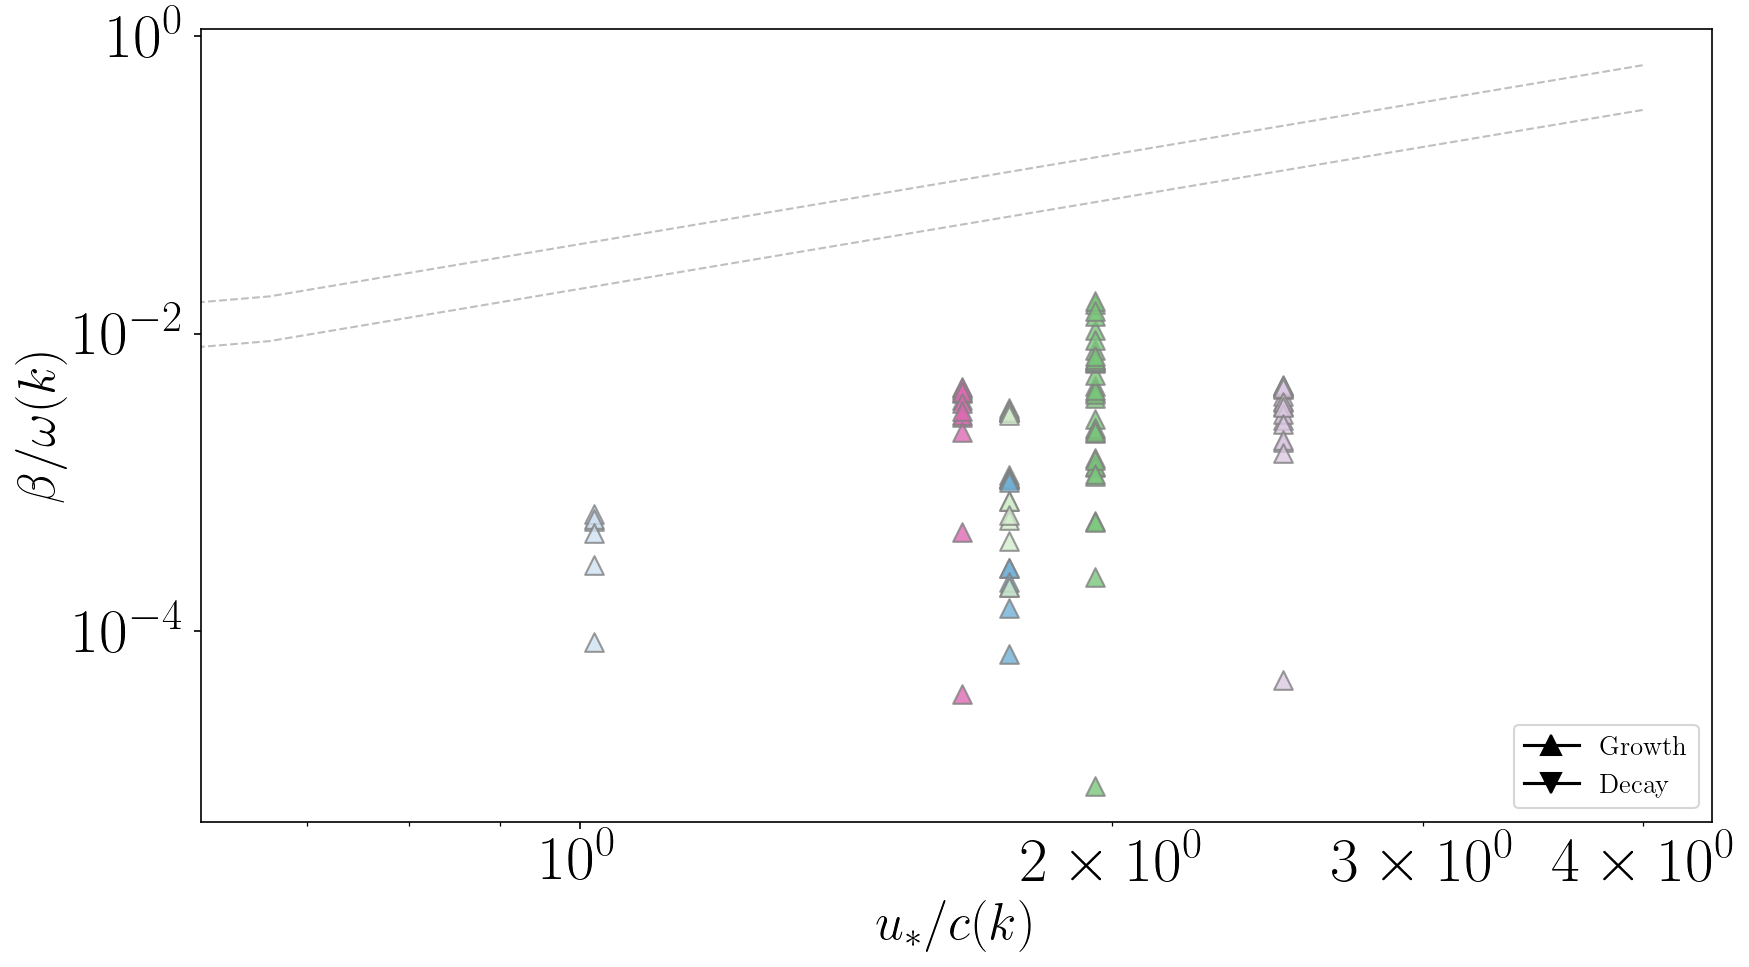

In [20]:
import math as m
from scipy.stats import linregress

'''
plt.rcParams.update({
    'legend.fontsize': 'x-large',
    'figure.figsize': (14, 9),
    'axes.labelsize': 25,
    'axes.titlesize': 30,
    'xtick.labelsize': 30,
    'ytick.labelsize': 30
})


fig, ax4 = plt.subplots(figsize=(13, 7))

avg = []
avg2 = []
cbound = []
cfree = []
avgfree=[]
avgbound=[]
        
cfree_mean =[]
cbound_mean =[]



g = np.array([4, 1, 0.5])  # u/c = [0.125, 0.25, 0.5]
sigma = np.array([0.00125, 0.0003125,  0.00006125])
cc= np.array([1, 0.5, 0.33])
rho = 1

uc_values = [0.25, 0.5, 0.75]  # Asegúrate de incluir 0.75 aquí
uc_color_map = {
    0.25: 'Blues',
    0.5: 'PuRd',
    0.75: 'Greens'  # Asegúrate de tener un color asignado para 0.75
}

ratio = (0.25-0.1)/(0.6*7/8) # ak per unit colour
vmin = 0.1 - ratio*(0.2+0.6*1/8)
vmax = 0.25 + ratio*0.2
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

#color = [plt.cm.get_cmap('magma')((j+2) /8), plt.cm.get_cmap('viridis')((j+2) /8) , 
norm_u11 =[]
norm_u22 =[]

Re_water = 2.5 * 10**4
kk = np.linspace(1,20,20)
k_all = np.linspace(0,100,25)
nu_water_025 = cc[0]*2 * m.pi / (4 *Re_water)
nu_water_05 = cc[1]*2 * m.pi / (4 *Re_water)
nu_water_075 = cc[2]*2 * m.pi / (4 *Re_water)

k_threshold = []

size_min = 0 # Tamaño mínimo del marcador
size_max = 240  # Tamaño máximo del marcador

        # Inicializa los tamaños de los marcadores
size_normal = 0
size_highlighted = 240

marker_sizes = size_min + (size_max - size_min) 

threshold_list = []
level_values = np.array([10,11])

for i, uc in enumerate(uc_values):
    cmap = plt.cm.get_cmap(uc_color_map[uc])
    for ma, level in enumerate(level_values):

        if level == 10:
            
            for j, ak in enumerate(ak_values):
                
                label = f'ak={ak} u/c={uc} L ={level}'
                print(label)
                if uc == 0.25:
                    i = 0
                    omegap = np.sqrt(4*4)
                    nu_water = nu_water_025
                    ls = 'o'
                    if ak == 0.08:
                        print('entra ak08 uc25')
                        df_beta = df_beta_kpHs008_upc025
                        df_energy = df_kpHs008_upc025

                    elif ak == 0.16:
                        print('entra ak16 uc25')
                        df_beta = df_beta_kpHs016_upc025
                        df_energy = df_kpHs016_upc025
                elif uc == 0.5:
                    i = 1
                    omegap = np.sqrt(4*1)
                    nu_water = nu_water_05
                    ls = 'o'
                    if ak == 0.08:
                        df_beta = df_beta_kpHs008_upc05
                        df_energy = df_kpHs008_upc05

                    elif ak == 0.16:
                        #print('entra ak16 uc25')
                        df_beta = df_beta_kpHs016_upc05
                        df_energy = df_kpHs016_upc05
                        
                elif uc == 0.75:
                    i = 2
                    omegap = np.sqrt(4*0.5)
                    nu_water = nu_water_075
                    ls = 'o'
                    if ak == 0.08:
                        df_beta = df_beta_kpHs008_upc075
                        df_energy = df_kpHs008_upc075

                    elif ak == 0.16:
                        #print('entra ak16 uc25')
                        df_beta = df_beta_kpHs016_upc075
                        df_energy = df_kpHs016_upc075
                    
                
                color = cmap(norm(ak))
                print('omegap', omegap)
                #-----------------------------------------
                #print( ak , color, j)
                
                df_growth = df_beta[df_beta['Tipo'] == 'Growth']
                df_decay = df_beta[df_beta['Tipo'] == 'Decay']
                
                #print( ak , color, j)
                c_bound_theory_growth = c(g[i], df_growth['k'], sigma[i], rho)

                c_bound_data_growth = df_growth['Omega']/(df_growth['k'])

                avg_beta_omega_bound_growth = (df_growth['Beta'] / df_growth['Omega']).mean()

                
                c_bound_theory_decay = c(g[i], df_decay['k'], sigma[i], rho)

                c_bound_data_decay =df_decay['Omega']/(df_decay['k'])

                avg_beta_omega_bound_decay = (df_decay['Beta'] / df_decay['Omega'] ).mean()
                 # Grafica todos los puntos con el tamaño normal
                #ax4.scatter((0.25/c_bound_data_growth), (df_growth['beta'][1:]), alpha=0.8, color=color, marker='o', s=40, edgecolors= 'k') #+ 4 * nu_water * df['k']**2
                
                # Grafica todos los puntos con el tamaño normal
                
                print(c_bound_data_growth.shape, df_growth['Beta'].shape)
                print(c_bound_data_decay.shape, df_decay['Beta'].shape)
                
                ax4.scatter((0.25/c_bound_data_growth), df_growth['Beta']/omegap,alpha=0.8, color=color, marker= "^", s = 80, edgecolors= 'grey')
                ax4.scatter((0.25/c_bound_data_decay), df_decay['Beta']/omegap,alpha=0.8, color=color, marker= "v", s = 80, edgecolors= 'grey')

            #----------------------------------------

#kk = np.linspace(0,80, len(df['omega'][1:]))
            
#ax4.plot(g[i]*kk/omegap**2, (g[i]*kk)**(1/2)/omegap , '--', alpha=0.7, color='gray', lw=2)

#ax4.text(8,2.2, r'$\sqrt{gk}$' , color='grey', fontsize = 15)

legend_elements = []

vmin = 0.08
vmax = 0.16
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

# Calculate positions for the colorbars vertically stacked
colorbar_height = 0.015  # The height of each colorbar
colorbar_width = 0.25  # The width of each colorbar
vertical_spacing = 0.08  # Space between colorbars
colorbar_start_x = 0.15 # X position where the colorbars start
colorbar_start_y = 0.1 # Y position where the first (bottom) colorbar starts

colorbar_positions = {
    0.25: [colorbar_start_x, colorbar_start_y + colorbar_height + vertical_spacing, colorbar_width, colorbar_height],
    0.5: [colorbar_start_x, colorbar_start_y + 2 * (colorbar_height + vertical_spacing), colorbar_width, colorbar_height],
    0.75 : [colorbar_start_x, colorbar_start_y + 3 * (colorbar_height + vertical_spacing), colorbar_width, colorbar_height]

}

ak_values_normalized = [0.08,0.16]

'''
'''
for uc, cmap_name in uc_color_map.items():
    cmap = plt.cm.get_cmap(cmap_name)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # Necessary for the colorbar to use ScalarMappable
    
    # Add an axis for each colorbar
    cb_ax = fig.add_axes(colorbar_positions[uc])  # Adjust the position as needed
    cb = plt.colorbar(sm, cax=cb_ax, orientation='horizontal')
    cb.set_label(f'$u_*/c$ = {uc}',fontsize=15)
    cb.set_ticks([vmin, vmax])
    cb.set_ticklabels([str(vmin), str(vmax)])
    cb.ax.xaxis.set_ticks_position('top')
    cb.set_ticks(ak_values_normalized)
    # Set tick labels corresponding to ak values
    cb.set_ticklabels(['0.08', '0.16'])
    # Reduce the size of tick labels
    cb.ax.tick_params(labelsize=15) 

'''   
'''
#ax4.axvline(x=1, color='k', linestyle='--', linewidth=1, alpha= 0.4,  label=r'$k/k_{p}=1$')
#ax4.axhline(y=0, color='k', linestyle='--', linewidth=1, alpha= 0.4,  label=r'$k/k_{p}=1$')

legend_elements.append(Line2D([0], [0], marker='^', color='black', label=r'Growth', markersize=10))
legend_elements.append(Line2D([0], [0], marker='v', color='black', label=r'Decay', markersize=10))


# Plant's estimation
# β = (0.04 ± 0.02)(u∗/c)2  

uc= (np.linspace(-2,4,10))
ax4.plot(uc , 0.04*uc**2, '--', lw = 1, c='gray', alpha = 0.5)       
ax4.plot(uc , 0.02*uc**2, '--', lw = 1, c='gray', alpha = 0.5)
#ax4.fill_between(uc, +0.04*uc**2, +0.07*uc**2, color='gray', alpha=.2)
#ax4.text(0.5, -0.05, r'$\beta =  (0.04 ± 0.02)(u_{\ast}/c )^2$', color='gray', alpha=1 ) 


#legend_elements.append(Line2D([0], [0], marker='*', color='black', label=r'$\nu_{0.25}$', markersize=10))
#legend_elements.append(Line2D([0], [0], marker='^', color='black', label=r'$\nu_{0.5}$', markersize=10))
#legend_elements.append(Line2D([0], [0], marker='o', color='black', label=r'$\nu_{0.75}$', markersize=10))


#Añade la leyenda al gráfico
ax4.legend(handles=legend_elements, loc='lower right', fontsize=13)

#ax4.plot(kk, - 4 * nu_water_025 * kk**2,'--*' , c='gray', alpha = 0.6, lw = 0.1, ms = 5)
#ax4.plot(kk, - 4 * nu_water_05 * kk**2,  '--^',c='gray',  alpha = 0.6, lw = 0.1 , ms = 5)
#ax4.plot(kk, - 4 * nu_water_075 * kk**2,  '--o',c='gray',  alpha = 0.6, lw = 0.1 , ms = 5)

ax4.set_yscale('log')
ax4.set_xscale('log')
#ax4.set_ylim([10**-6,1])
#ax4.set_xlim([0.9,10**1.1])

#ax4.set_ylim([-0.035,0.02])
#ax4.set_xlim([0,5])
ax4.tick_params(axis='x')
ax4.tick_params(axis='y')

ax4.set_xlabel(r'$u_{*}/c(k)$')
ax4.set_ylabel(r'$  \beta/\omega(k) $')


#ax4.set_tittle('Growth and Decay Rates by Wavenumber', fontsize=16)
plt.show()
'''

In [23]:
df_beta_interval_kpHs008_upc025 = pd.read_csv('betas/df_beta_interval_kpHs008_upc025.csv')

df_beta_interval_kpHs016_upc025 = pd.read_csv('betas/df_beta_interval_kpHs016_upc025.csv')

df_beta_interval_kpHs008_upc05 = pd.read_csv('betas/df_beta_interval_kpHs008_upc05.csv')

df_beta_interval_kpHs016_upc05 = pd.read_csv('betas/df_beta_interval_kpHs016_upc05.csv')

df_beta_interval_kpHs008_upc075 = pd.read_csv('betas/df_beta_interval_kpHs008_upc075.csv')

df_beta_interval_kpHs016_upc075 = pd.read_csv('betas/df_beta_interval_kpHs016_upc075.csv')

ak=0.08 u/c=0.25 L =10
entra ak08 uc25
omegap 4.0
4.0
ak=0.16 u/c=0.25 L =10
entra ak16 uc25
omegap 4.0
4.0
ak=0.08 u/c=0.5 L =10
omegap 2.0
2.0
ak=0.16 u/c=0.5 L =10
omegap 2.0
2.0
ak=0.08 u/c=0.75 L =10
omegap 1.4142135623730951
1.4142135623730951
ak=0.16 u/c=0.75 L =10
omegap 1.4142135623730951
1.4142135623730951


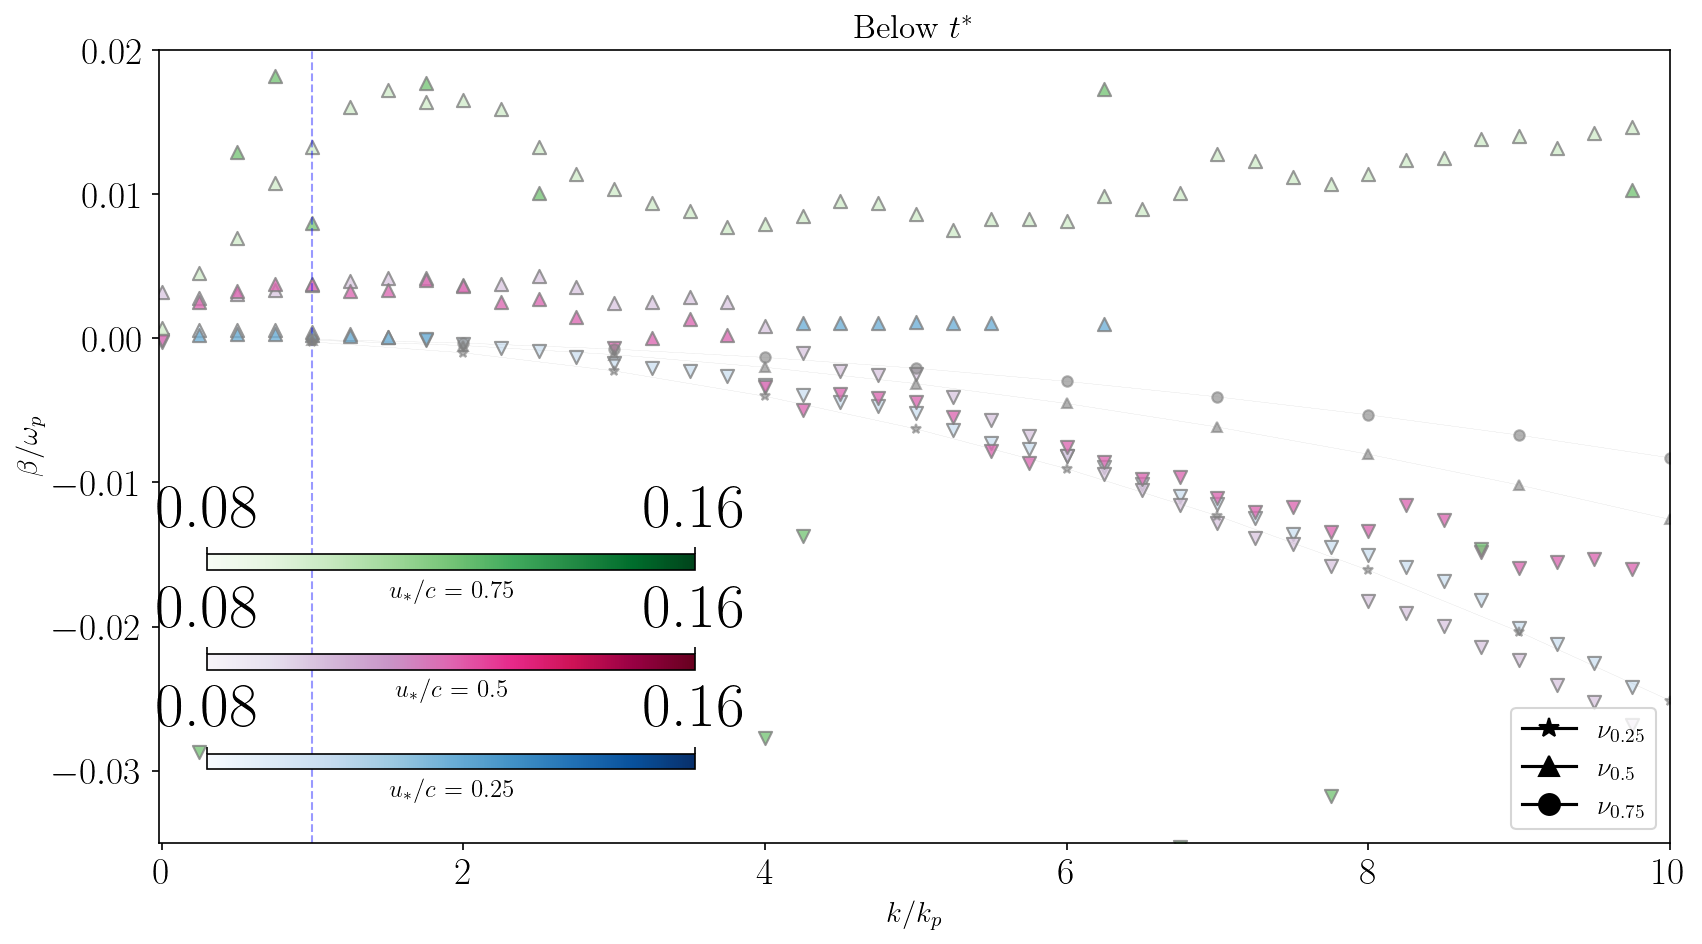

In [24]:
import math as m
from scipy.stats import linregress

fig, ax4 = plt.subplots(figsize=(13, 7))

avg = []
avg2 = []
cbound = []
cfree = []
avgfree=[]
avgbound=[]
        
cfree_mean =[]
cbound_mean =[]



g = np.array([4, 1, 0.5])  # u/c = [0.125, 0.25, 0.5]
sigma = np.array([0.00125, 0.0003125,  0.00006125])
cc= np.array([1, 0.5, 0.33])
rho = 1

uc_values = [0.25, 0.5, 0.75]  # Asegúrate de incluir 0.75 aquí
uc_color_map = {
    0.25: 'Blues',
    0.5: 'PuRd',
    0.75: 'Greens'  # Asegúrate de tener un color asignado para 0.75
}

ratio = (0.25-0.1)/(0.6*7/8) # ak per unit colour
vmin = 0.1 - ratio*(0.2+0.6*1/8)
vmax = 0.25 + ratio*0.2
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

#color = [plt.cm.get_cmap('magma')((j+2) /8), plt.cm.get_cmap('viridis')((j+2) /8) , 
norm_u11 =[]
norm_u22 =[]

Re_water = 2.5 * 10**4
kk = np.linspace(1,20,20)
k_all = np.linspace(0,100,25)
nu_water_025 = cc[0]*2 * m.pi / (4 *Re_water)
nu_water_05 = cc[1]*2 * m.pi / (4 *Re_water)
nu_water_075 = cc[2]*2 * m.pi / (4 *Re_water)

k_threshold = []

size_min = 0 # Tamaño mínimo del marcador
size_max = 240  # Tamaño máximo del marcador

        # Inicializa los tamaños de los marcadores
size_normal = 0
size_highlighted = 240
#k_values = df['k']  # Reemplazar con tu columna real de valores 'k'
# Normalizar los valores 'k' al rango [0, 1]
#k_normalized = (k_values - k_values.min()) / (k_values.max() - k_values.min())
# Escalar al rango de tamaños de marcadores
marker_sizes = size_min + (size_max - size_min) 

threshold_list = []
level_values = np.array([10,11])

for i, uc in enumerate(uc_values):
    cmap = plt.cm.get_cmap(uc_color_map[uc])
    for ma, level in enumerate(level_values):

        if level == 10:
            
            for j, ak in enumerate(ak_values):
                
                label = f'ak={ak} u/c={uc} L ={level}'
                print(label)
                if uc == 0.25:
                    i = 0
                    omegap = np.sqrt(4*4)
                    nu_water = nu_water_025
                    ls = 'o'
                    if ak == 0.08:
                        print('entra ak08 uc25')
                        df_beta = df_beta_interval_kpHs008_upc025

                    elif ak == 0.16:
                        print('entra ak16 uc25')
                        df_beta = df_beta_interval_kpHs016_upc025

                elif uc == 0.5:
                    i = 1
                    omegap = np.sqrt(4*1)
                    nu_water = nu_water_05
                    ls = 'o'
                    if ak == 0.08:
                        df_beta = df_beta_interval_kpHs008_upc05

                    elif ak == 0.16:
                        #print('entra ak16 uc25')
                        df_beta = df_beta_interval_kpHs016_upc05
                        
                elif uc == 0.75:
                    i = 2
                    omegap = np.sqrt(4*0.5)
                    nu_water = nu_water_075
                    ls = 'o'
                    if ak == 0.08:
                        df_beta = df_beta_interval_kpHs008_upc075

                    elif ak == 0.16:
                        #print('entra ak16 uc25')
                        df_beta = df_beta_interval_kpHs016_upc075
                    
                
                color = cmap(norm(ak))
                print('omegap', omegap)
                #-----------------------------------------
                #print( ak , color, j)
                
                df_growth = df_beta[df_beta['Tipo'] == 'Growth']
                df_decay = df_beta[df_beta['Tipo'] == 'Decay']
                
                print(omegap)
                
                # Grafica todos los puntos con el tamaño normal
                ax4.scatter((df_growth['k'][1:]-1)/4, df_growth['Value'][1:]/omegap,alpha=0.8, color=color, marker= "^", s = 40, edgecolors= 'grey')
                ax4.scatter((df_decay['k']-1)/4, df_decay['Value']/omegap,alpha=0.8, color=color, marker= "v", s = 40, edgecolors= 'grey')

            #----------------------------------------

#kk = np.linspace(0,80, len(df['omega'][1:]))
            
#ax4.plot(g[i]*kk/omegap**2, (g[i]*kk)**(1/2)/omegap , '--', alpha=0.7, color='gray', lw=2)

#ax4.text(8,2.2, r'$\sqrt{gk}$' , color='grey', fontsize = 15)

legend_elements = []

vmin = 0.08
vmax = 0.16
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

# Calculate positions for the colorbars vertically stacked
colorbar_height = 0.015  # The height of each colorbar
colorbar_width = 0.25  # The width of each colorbar
vertical_spacing = 0.08  # Space between colorbars
colorbar_start_x = 0.15 # X position where the colorbars start
colorbar_start_y = 0.1 # Y position where the first (bottom) colorbar starts

colorbar_positions = {
    0.25: [colorbar_start_x, colorbar_start_y + colorbar_height + vertical_spacing, colorbar_width, colorbar_height],
    0.5: [colorbar_start_x, colorbar_start_y + 2 * (colorbar_height + vertical_spacing), colorbar_width, colorbar_height],
    0.75 : [colorbar_start_x, colorbar_start_y + 3 * (colorbar_height + vertical_spacing), colorbar_width, colorbar_height]

}

ak_values_normalized = [0.08,0.16]

for uc, cmap_name in uc_color_map.items():
    cmap = plt.cm.get_cmap(cmap_name)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # Necessary for the colorbar to use ScalarMappable
    
    # Add an axis for each colorbar
    cb_ax = fig.add_axes(colorbar_positions[uc])  # Adjust the position as needed
    cb = plt.colorbar(sm, cax=cb_ax, orientation='horizontal')
    cb.set_label(f'$u_*/c$ = {uc}', fontsize=12)
    cb.set_ticks([vmin, vmax])
    cb.set_ticklabels([str(vmin), str(vmax)])
    cb.ax.xaxis.set_ticks_position('top')
    cb.set_ticks(ak_values_normalized)
    # Set tick labels corresponding to ak values
    cb.set_ticklabels(['0.08', '0.16'])


ax4.axvline(x=1, color='blue', linestyle='--', linewidth=1, alpha= 0.4,  label=r'$k/k_{p}=1$')
legend_elements.append(Line2D([0], [0], marker='*', color='black', label=r'$\nu_{0.25}$', markersize=10))
legend_elements.append(Line2D([0], [0], marker='^', color='black', label=r'$\nu_{0.5}$', markersize=10))
legend_elements.append(Line2D([0], [0], marker='o', color='black', label=r'$\nu_{0.75}$', markersize=10))


#Añade la leyenda al gráfico
ax4.legend(handles=legend_elements, loc='lower right', fontsize=13)

ax4.plot(kk, - 4 * nu_water_025 * kk**2,'--*' , c='gray', alpha = 0.6, lw = 0.1, ms = 5)
ax4.plot(kk, - 4 * nu_water_05 * kk**2,  '--^',c='gray',  alpha = 0.6, lw = 0.1 , ms = 5)
ax4.plot(kk, - 4 * nu_water_075 * kk**2,  '--o',c='gray',  alpha = 0.6, lw = 0.1 , ms = 5)

#ax4.set_yscale('log')
#ax4.set_xscale('log')
#ax4.set_ylim([10**-3,10**-1])
#ax4.set_xlim([0.9,10**1.1])

ax4.set_ylim([-0.035,0.02])
ax4.set_xlim([-0.02,10])
ax4.tick_params(axis='x', labelsize=18)
ax4.tick_params(axis='y', labelsize=18)

ax4.set_xlabel(r'$k/k_p$', fontsize=14)
ax4.set_ylabel(r'$\beta / \omega_{p}  $', fontsize=14) #
ax4.set_title('Below $t^{*}$', fontsize=16)
plt.show()

In [27]:
'''
import matplotlib.pyplot as plt
import pandas as pd
fig = plt.figure(figsize=[7, 3])
# Lista de archivos CSV que has generado
csv_files = [
    'datos/datos_kpHs008_upc025.csv',
    'datos/datos_kpHs016_upc025.csv',
    'datos/datos_kpHs008_upc05.csv',
    'datos/datos_kpHs016_upc05.csv',
    'datos/datos_kpHs008_upc075.csv',
    'datos/datos_kpHs016_upc075.csv'
]

# Bucle para leer cada archivo, extraer los datos y graficar
for file in csv_files:
    df = pd.read_csv(file)
    
    # Suponiendo que tienes columnas 'k/kp' y 't*' en tu DataFrame
    kp_minimos = df['kp_minimos']
    tiempos_minimos = df['tiempos_minimos']

    plt.scatter(kp_minimos, tiempos_minimos, s=6, marker="*", label =f'{file}')
    plt.ylabel(r'$t^{*}$')
    plt.xlabel(r'$k/k_{p}$')
    plt.ylim([20, 100])
    plt.xlim([5.4, 10])
    plt.legend()
    #plt.title(f'Resultados para: {file.split("_")[2]} ak y {file.split("_")[3]} u/c')
    #plt.show()
'''

'\nimport matplotlib.pyplot as plt\nimport pandas as pd\nfig = plt.figure(figsize=[7, 3])\n# Lista de archivos CSV que has generado\ncsv_files = [\n    \'datos/datos_kpHs008_upc025.csv\',\n    \'datos/datos_kpHs016_upc025.csv\',\n    \'datos/datos_kpHs008_upc05.csv\',\n    \'datos/datos_kpHs016_upc05.csv\',\n    \'datos/datos_kpHs008_upc075.csv\',\n    \'datos/datos_kpHs016_upc075.csv\'\n]\n\n# Bucle para leer cada archivo, extraer los datos y graficar\nfor file in csv_files:\n    df = pd.read_csv(file)\n    \n    # Suponiendo que tienes columnas \'k/kp\' y \'t*\' en tu DataFrame\n    kp_minimos = df[\'kp_minimos\']\n    tiempos_minimos = df[\'tiempos_minimos\']\n\n    plt.scatter(kp_minimos, tiempos_minimos, s=6, marker="*", label =f\'{file}\')\n    plt.ylabel(r\'$t^{*}$\')\n    plt.xlabel(r\'$k/k_{p}$\')\n    plt.ylim([20, 100])\n    plt.xlim([5.4, 10])\n    plt.legend()\n    #plt.title(f\'Resultados para: {file.split("_")[2]} ak y {file.split("_")[3]} u/c\')\n    #plt.show()\n'

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

fig = plt.figure(figsize=[7, 3])

# Lista de archivos CSV que has generado
csv_files = [
    'datos_kpHs008_upc025.csv',
    'datos_kpHs016_upc025.csv',
    'datos_kpHs008_upc05.csv',
    'datos_kpHs016_upc05.csv',
    'datos_kpHs008_upc075.csv',
    'datos_kpHs016_upc075.csv'
]



# Colores para los puntos
colors = ['cyan', 'blue',  'magenta',  'red', 'lime', 'green']

ak_values = [0.08, 0.16,0.08, 0.16, 0.08, 0.16]
uc_values = [0.25, 0.25, 0.5, 0.5, 0.75, 0.75]

# Bucle para leer cada archivo, extraer los datos y graficar
for i, file in enumerate(csv_files):
    df = pd.read_csv(file)
    
    kp_minimos = df['kp_minimos']
    tiempos_minimos = df['tiempos_minimos']

    # Extraer uc y ak del nombre del archivo
    #uc = file.split("_")[2][3:]
    
    ak = ak_values[i]
    uc = uc_values[i]
    #ak = file.split("_")[1][4:]
    label = f'ak={ak}, u/c={uc}'

    plt.scatter(kp_minimos, tiempos_minimos, s=40, alpha = 0.5, marker="*", color=colors[i], label=label)

plt.ylabel(r'$t^{*}$')
plt.xlabel(r'$k/k_{p}$')
plt.ylim([20, 100])
plt.xlim([5.4, 10])
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), frameon=False)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors

# Definir el mapeo de uc a colores
uc_color_map = {
    '025': 'Blues',
    '05': 'PuRd',
    '075': 'Greens'
}

# Asumiendo que 'norm' es para normalizar los valores de 'ak'
vmin = 0.08
vmax = 0.16
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

# Lista de archivos CSV
csv_files = [
    'datos_kpHs008_upc025.csv',
    'datos_kpHs016_upc025.csv',
    'datos_kpHs008_upc05.csv',
    'datos_kpHs016_upc05.csv',
    'datos_kpHs008_upc075.csv',
    'datos_kpHs016_upc075.csv'
]

fig, ax = plt.subplots(figsize=(13, 7))

for file in csv_files:
    df = pd.read_csv(file)
    kp_minimos = df['kp_minimos']
    tiempos_minimos = df['tiempos_minimos']

    # Extraer uc del nombre del archivo
    parts = file.split("_")
    uc_key = parts[2][3:].replace('.csv', '')  # Obtiene '025', '05', '075'

    # Obtener el colormap basado en uc
    cmap_name = uc_color_map[uc_key]
    cmap = plt.cm.get_cmap(cmap_name)
    color = cmap(norm(float('.' + uc_key if len(uc_key) == 2 else '0.' + uc_key)))

    # Graficar
    ax.scatter(kp_minimos, tiempos_minimos, color=color, s=40, alpha=0.8, edgecolors='grey', label=f'uc={uc_key}')

plt.ylabel(r'$t^{*}$')
plt.xlabel(r'$k/k_{p}$')
plt.ylim([20, 100])
plt.xlim([5.4, 10])
plt.legend()
plt.show()

